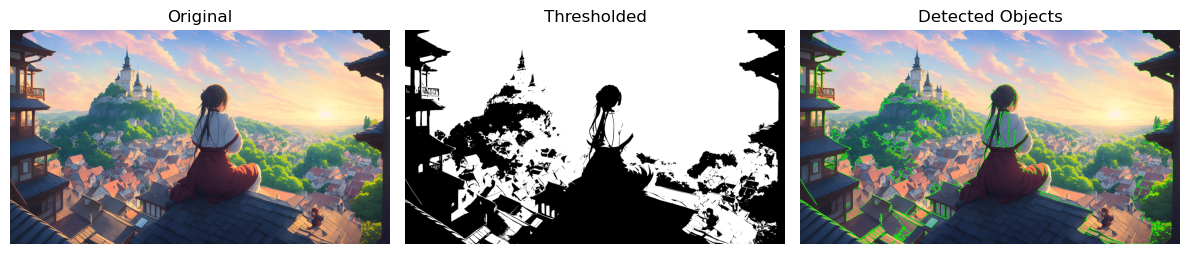

In [9]:
# 4.Write a Program for detect the object.
import cv2
import matplotlib.pyplot as plt

# Load and preprocess image
image = cv2.imread("ML/Wallpaper.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding
_, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)

# Find and draw contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

# Display all images
titles = ["Original", "Thresholded", "Detected Objects"]
images = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB), thresh, cv2.cvtColor(output, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray' if i == 1 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


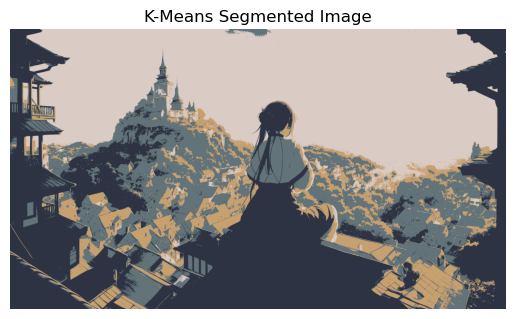

In [48]:
#1. Write a Program to Region based segmentation - clustering technique.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and reshape image
img = cv2.imread("Wallpaper (1).jpg")
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# Define K and criteria, apply KMeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
_,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

# Show segmented image
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("K-Means Segmented Image")
plt.axis('off')
plt.show()


Original Image Size   : 1122.58 KB
Compressed Image Size : 316.82 KB


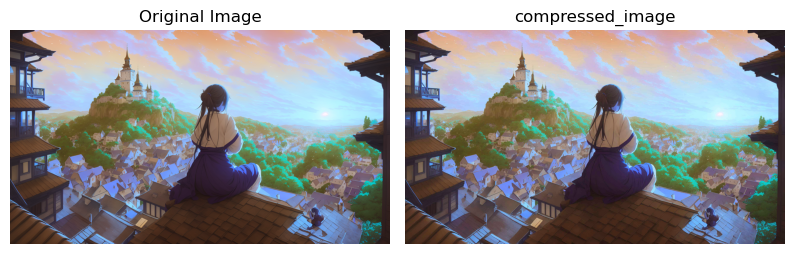

In [31]:
#2.. Write a Program on Image Compression algorithm
import cv2
import os
import matplotlib.pyplot as plt
#import cv2_imshow # Ensure this is imported

# Replace with your actual image path
image_path = "Wallpaper (1).jpg"

# Load the image
image = cv2.imread(image_path)

# Save compressed version (low quality JPEG)
compressed_path = "compressed_image.jpg"
cv2.imwrite(compressed_path, image, [cv2.IMWRITE_JPEG_QUALITY, 30])  # 0-100

# Get file sizes
original_size_kb = os.path.getsize(image_path) / 1024
compressed_size_kb = os.path.getsize(compressed_path) / 1024

# Print sizes
print(f"Original Image Size   : {original_size_kb:.2f} KB")
print(f"Compressed Image Size : {compressed_size_kb:.2f} KB")

# Read and show both images
compressed_image = cv2.imread(compressed_path)
Original_image = cv2.imread(image_path)
# Use cv2_imshow instead of cv2.imshow
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(Original_image,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title("compressed_image")
plt.axis('off')


plt.tight_layout()
plt.show()

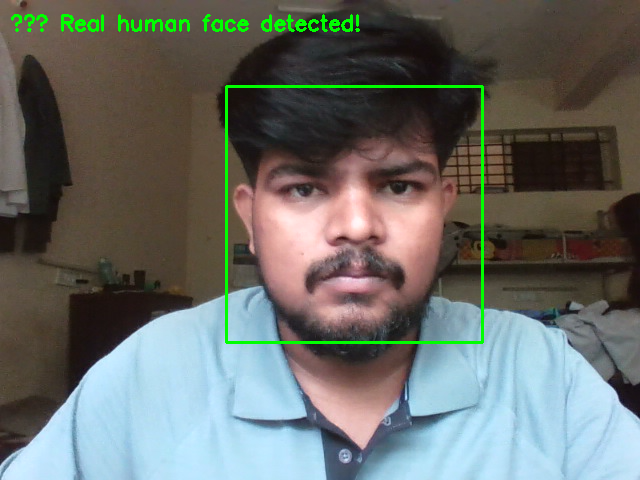

In [13]:
#3.Write a Program for human face detection using webcam.
import cv2
import numpy as np
from PIL import Image
from IPython.display import display, clear_output
import time

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not access webcam.")
else:
    try:
        for _ in range(100):  # Capture 100 frames
            ret, frame = cap.read()
            if not ret:
                break

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=8)

            message = ""

            # Heuristic: If exactly one strong face detected → assume it's real
            if len(faces) == 1:
                (x, y, w, h) = faces[0]
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
                message = "✅ Real human face detected!"
            else:
                message = "❌ Error: No real face detected."

            # Add text message on frame
            cv2.putText(frame, message, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, (0, 0, 255) if "Error" in message else (0, 255, 0), 2)

            # Display frame in notebook
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            clear_output(wait=True)
            display(Image.fromarray(rgb))
            time.sleep(0.05)

    except KeyboardInterrupt:
        print("Stopped.")
    finally:
        cap.release()


In [ ]:
#5.Write a Program to demonstrate enhancing and segmenting low contrast 2D images

import cv2
import matplotlib.pyplot as plt

# Step 1: Load a low contrast grayscale image
image = cv2.imread("wallpaper.jpg", cv2.IMREAD_GRAYSCALE)  # Use your own path

# Step 2: Enhance contrast using Histogram Equalization
enhanced = cv2.equalizeHist(image)

# Step 3: Segment the image using simple Thresholding
_, segmented = cv2.threshold(enhanced, 100, 255, cv2.THRESH_BINARY)

# Step 4: Display all results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Low Contrast Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(enhanced, cmap='gray')
plt.title("Enhanced Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
#6. Extracting Facial Features (Eyes, Nose, Mouth)
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Load the image and convert to RGB
img = cv2.imread("Wallpaper (1).jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Initialize MediaPipe FaceMesh
face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)

# Process the image to find facial landmarks
results = face_mesh.process(img_rgb)

# Draw a few key points for eyes, nose, mouth
if results.multi_face_landmarks:
    for face in results.multi_face_landmarks:
        h, w = img.shape[:2]
        key_points = [33, 133, 1, 2, 61, 291]  # eyes, nose, mouth landmarks
        for idx in key_points:
            pt = face.landmark[idx]
            x, y = int(pt.x * w), int(pt.y * h)
            cv2.circle(img, (x, y), 2, (0, 255, 0), -1)  # Green dots

# Display using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Facial Features (Eyes, Nose, Mouth)")
plt.axis('off')
plt.show()


ImportError: DLL load failed while importing _framework_bindings: A dynamic link library (DLL) initialization routine failed.

In [5]:
!pip install streamlit tensorflow pillow mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [1]:
#6. Extracting Facial Features (Eyes, Nose, Mouth)
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
# Load the image
image_path = r"Wallpaper (1).jpg"  
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("Image not found!")
# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
# Convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Process the image and get face landmarks
results = face_mesh.process(image_rgb)

# Draw facial features
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Draw eyes (landmarks around eyes)
        eye_indices = list(range(33, 133)) + list(range(133, 144)) + list(range(153, 173))  # Both eyes
        for idx in eye_indices:
            pt = face_landmarks.landmark[idx]
            x, y = int(pt.x * image.shape[1]), int(pt.y * image.shape[0])
            cv2.circle(image, (x, y), 1, (255, 0, 0), -1)  # Blue for eyes
        # Draw nose
        nose_indices = [1, 2, 98, 327]
        for idx in nose_indices:
            pt = face_landmarks.landmark[idx]
            x, y = int(pt.x * image.shape[1]), int(pt.y * image.shape[0])
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Green for nose
        # Draw mouth
        mouth_indices = list(range(61, 88)) + list(range(178, 191))
        for idx in mouth_indices:
            pt = face_landmarks.landmark[idx]
            x, y = int(pt.x * image.shape[1]), int(pt.y * image.shape[0])
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1)  # Red for mouth
# Show result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Facial Features (Eyes: Blue, Nose: Green, Mouth: Red)")
plt.axis("off")
plt.show()


ImportError: DLL load failed while importing _framework_bindings: A dynamic link library (DLL) initialization routine failed.

In [9]:
#7. Write a program to detect the motion of an object in an input video.
import cv2

# Load video
cap = cv2.VideoCapture("2539559-hd_1920_1080_24fps.mp4")

# Read first frame
ret, prev = cap.read()
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert current frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Find difference between current and previous frame
    diff = cv2.absdiff(prev_gray, gray)

    # Threshold the difference
    _, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

    # Find and draw contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:69
        if cv2.contourArea(cnt) > 500:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show output
    cv2.imshow("Motion Detection", frame)
    prev_gray = gray

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [3]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable
